In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [4]:
from imutils import paths

In [5]:
#Data visualization
#training set
data_train_def=list(paths.list_images("D:\Documents\TrainDefective")) 
data_train_nondef=list(paths.list_images("D:\Documents\TrainNonDefective"))
#testing set
data_test_def=list(paths.list_images("D:\Documents\TestDefective"))
data_test_nondef=list(paths.list_images("D:\Documents\TestNonDefective"))
#validation set
data_valid_def=list(paths.list_images("D:\Documents\ValidDefective"))
data_valid_nondef=list(paths.list_images("D:\Documents\ValidNonDefective"))

In [6]:
data_train_def

['D:\\Documents\\TrainDefective\\131004959_171473721383413_8222187747086021011_n.jpg',
 'D:\\Documents\\TrainDefective\\131051004_382613492830631_1306891331783850055_n.jpg',
 'D:\\Documents\\TrainDefective\\131065180_999185033824671_7735147288489715620_n.jpg',
 'D:\\Documents\\TrainDefective\\131084537_190751489449739_279862595635733772_n.jpg',
 'D:\\Documents\\TrainDefective\\131092897_149705809860659_8798464983059531038_n.jpg',
 'D:\\Documents\\TrainDefective\\131098429_134147575143001_1246437012995704959_n.jpg',
 'D:\\Documents\\TrainDefective\\131129946_140815574232570_8925999503657494497_n.jpg',
 'D:\\Documents\\TrainDefective\\131275810_2686956714949012_5021348409242545922_n.jpg',
 'D:\\Documents\\TrainDefective\\131348023_405054987354853_8834671660058234194_n.jpg',
 'D:\\Documents\\TrainDefective\\131437543_500273490949549_5045378072687137331_n.jpg',
 'D:\\Documents\\TrainDefective\\2007.05.16_-_002_Broken_rail_weld_-_Flickr_-_faxepl (1).jpg',
 'D:\\Documents\\TrainDefective\\20

In [7]:
#size of dataset - train,test,valid
#type(data_train_def)
print(len(data_train_def))
print(len(data_train_nondef))
print(len(data_test_def))
print(len(data_test_nondef))
print(len(data_valid_def))
print(len(data_valid_nondef))

149
150
11
11
31
31


In [8]:
#Visualizing 5 images
count=0
for i in data_train_def:
    count+=1
    image=cv2.imread(i)
    cv2.imshow("Defective Track - Training set",image)
    
    cv2.waitKey()
    if(count>=5):
        break
cv2.destroyAllWindows()

In [9]:
#preprocessing - Data Augmentation

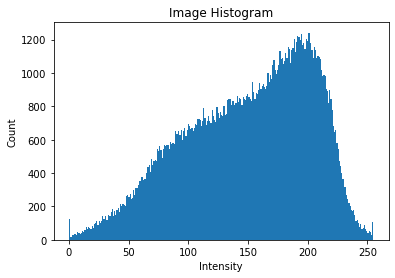

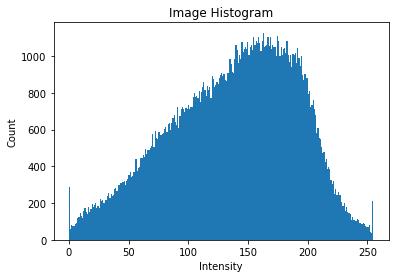

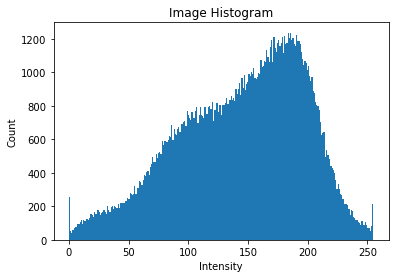

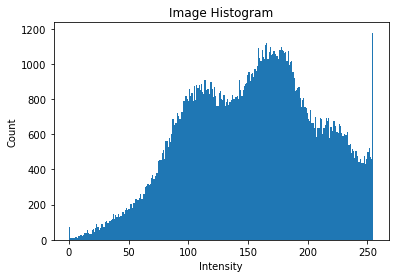

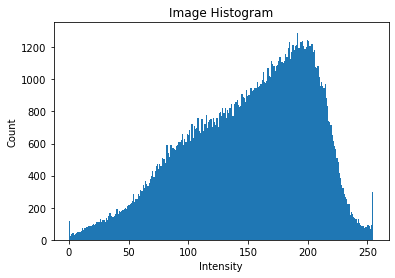

In [10]:
#image histogram - Intensity range ~ (0,250)
#training set
c=0
from skimage import io
for im in data_train_def:
    c+=1
    hist_image = io.imread(im)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.title("Image Histogram")
    ax = plt.hist(hist_image.ravel(), bins = 256)
    plt.show()
    if(c>=5):
        break

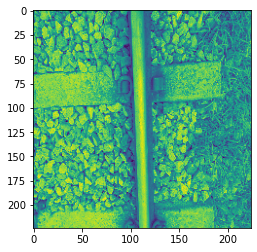

In [11]:
#img_gr=plt.imread(data_train_def[0])
img_gr=cv2.imread(data_train_def[0])
img_gr=cv2.cvtColor(img_gr,cv2.COLOR_BGR2GRAY)
img_gr=np.float32(img_gr) #vectorization
plt.imshow(img_gr)

In [12]:
print(img_gr)

[[104. 226. 177. ... 158. 109.  70.]
 [109. 120. 204. ... 148. 133.  81.]
 [123. 125. 184. ... 175. 164. 160.]
 ...
 [ 87.  98.  97. ... 136. 151. 145.]
 [ 93.  93.  96. ... 128. 139. 160.]
 [ 90.  95.  88. ... 150. 113.  91.]]


In [13]:
#x_train_def=np.float32(data_train_def[0])
'''X_train_grayscale = np.zeros(data_train_def.shape[:-1])
for i in (data_train_def): 
    X_train_grayscale[i] = cv2.cvtColor(data_train_def[i], cv2.COLOR_BGR2GRAY) '''


'X_train_grayscale = np.zeros(data_train_def.shape[:-1])\nfor i in (data_train_def): \n    X_train_grayscale[i] = cv2.cvtColor(data_train_def[i], cv2.COLOR_BGR2GRAY) '

In [14]:
#Normalization
#sampleimg=cv2.imread(data_train_def)
res_sampleimg=np.zeros((800,800))
norm_sampleimg=cv2.normalize(img_gr,res_sampleimg,0,100,cv2.NORM_MINMAX)
#cv2.imshow("Normalized image",norm_sampleimg)
print(norm_sampleimg)

[[40.55118  88.58267  69.291336 ... 61.811024 42.519684 27.165354]
 [42.519684 46.85039  79.92126  ... 57.874016 51.968502 31.496063]
 [48.031494 48.818897 72.04724  ... 68.50394  64.173225 62.598423]
 ...
 [33.85827  38.188976 37.795273 ... 53.149605 59.05512  56.692913]
 [36.22047  36.22047  37.401573 ... 50.       54.330708 62.598423]
 [35.039368 37.007874 34.25197  ... 58.661415 44.094486 35.43307 ]]


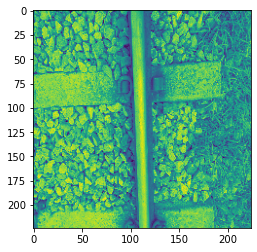

In [15]:
plt.imshow(norm_sampleimg)

In [17]:
!pip install mplcyberpunk
import tensorflow as tf
import cv2, pathlib, mplcyberpunk, math, os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import matplotlib.pyplot as plt
from PIL import Imag

In [18]:
epochs = 30
batch_size = 32
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)

def create_data_binary():
    data_gen = ImageDataGenerator(rescale=1.0 / 255)
    train_ds = data_gen.flow_from_directory('/kaggle/input/railway-track-fault-detection-resized-224-x-224/train/', target_size=(img_height, img_width),
                                            class_mode='binary', batch_size=batch_size, subset='training')
    test_ds = data_gen.flow_from_directory('/kaggle/input/railway-track-fault-detection-resized-224-x-224/test/', target_size=(img_height, img_width),
                                          class_mode='binary', batch_size=batch_size, shuffle=False)
    val_ds = data_gen.flow_from_directory('/kaggle/input/railway-track-fault-detection-resized-224-x-224/valid/', target_size=(img_height, img_width),
aa
    return train_ds, test_ds, val_ds
train_ds, test_ds, val_ds = create_data_binary()